In [23]:
import random
from os import sep, listdir
from os.path import isfile, join
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np 
from scipy import ndimage
import skimage.transform as tr
from scipy.io import loadmat, savemat
import spectral as sp
import shapefile
import pandas as pd

### Getting Hyperspectral and LiDAR chm .mat files 
Ensure The dataset has been fetched and processed 


In [2]:
DATASET_PATH = 'ECODSEdataset' + sep + 'ECODSEdataset'+ sep + 'RSdata'+ sep 
LIDAR_FOLDER_PATH = DATASET_PATH + 'chm' + sep + 'MAT' + sep 
HYPER_FOLDER_PATH = DATASET_PATH + 'hs'  + sep + 'MAT' + sep 
HYPER_BANDS_FILE = 'ECODSEdataset' + sep + 'ECODSEdataset' + sep + 'hyper_bands.csv'

try: 
    lidar_files = sorted([lidar_file for lidar_file in 
                 [f for f in listdir(LIDAR_FOLDER_PATH) if isfile(join(LIDAR_FOLDER_PATH, f))]])
    hyper_files = sorted([hyper_file for hyper_file in 
                 [f for f in listdir(HYPER_FOLDER_PATH) if isfile(join(HYPER_FOLDER_PATH, f))]])
    hyper_bands = pd.read_csv(HYPER_BANDS_FILE)
except FileNotFoundError: 
    print("Failed to find Processed Dataset.\nPlease follow the README instructions to fetch and process the dataset")


In [3]:
# TODO Remove this 
wavelengths = hyper_bands['Band_nanometers']

### Plotting Functions

In [4]:
def plot_chm(im):
    cmap = cm.get_cmap('tab20c', 4)
    plt.imshow(im, cmap=cmap, vmin=0, vmax=1, origin='lower')
    plt.title("LiDAR Heat Map")
    plt.colorbar(ticks=np.linspace(0,1,5))
    plt.show()

def plot_hyper(im):
    sp.imshow(im, (80,80,420), origin="lower")
    
def plot_hyper_bands(im, pixel_x, pixel_y, wavelengths):
    plt.plot(wavelengths, im[pixel_x][pixel_y])
    plt.show()

#### Hyperspectral Image Bands without any processing

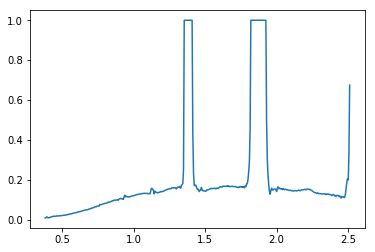

In [5]:
hyper_image = loadmat(HYPER_FOLDER_PATH + hyper_files[3])['image'] 
plot_hyper_bands(hyper_image, pixel_x=40, pixel_y=25, wavelengths=wavelengths)

### Dimensionality Reduction for Hyperspectral Images

In [16]:
def trim_bands(source_list, filter_list):
    trimmed = []
    for i in range(len(filter_list)):
        if filter_list[i] == 0:
            trimmed.append(source_list[i])
    return trimmed 

def purge_noisy_bands(image, band_filter):
    out = np.zeros([80,80,369])
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            out[i][j] = trim_bands(image[i][j], band_filter)
    return out
            
def process_hyper_images():
    pass

#### Using the Band Filter in Data set to reduce dimensionality

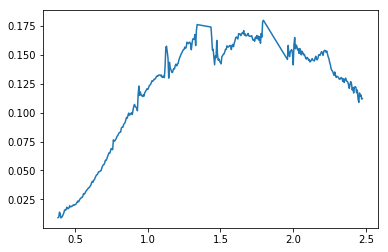

In [9]:
# wavelengths = hyper_bands['Band_nanometers']
noise_flags = hyper_bands['Noise_flag']
another = hyper_image[40][25]
trimmed = trim_bands(another, list(noise_flags))
trim_wavelengths = trim_bands(wavelengths, list(noise_flags))
plt.plot(trim_wavelengths,trimmed)

In [19]:
out_image = purge_noisy_bands(hyper_image, noise_flags)

ImageView object:
  Display bands       :  [0, 184.5, 368]
  Interpolation       :  <default>
  RGB data limits     :
    R: [0.0, 0.03653820509401254]
    G: [0.030337378317108945, 0.38478463795172685]
    B: [0.01986931590878784, 0.21582877717028937]

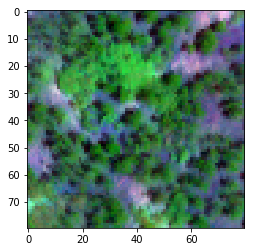

In [22]:
len(noise_flags[noise_flags == 1])

57

In [26]:
sample = np.zeros([3,3,3])
savemat('some.mat', {'some': sample})
print(loadmat('some.mat')['some'])
sample2 = np.zeros(5)
savemat('some.mat', {'some': sample2})
print(loadmat('some.mat')['some'])

[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]
[[0. 0. 0. 0. 0.]]


In [27]:
l = [1,2,3]
l[2:3]

[3]

In [28]:
if False and False: 
    pass 
else: 
    print('Yo')

Yo
